# 분류 분석

## 이진 고객 이탈

고객의 웹사이트 광고를 제공하는 마케팅 대행사에서 당사의 고객이탈율이 꽤 높다는 사실을 알게됐습니다.<br>
그 회사에서는 즉시 고객 관리자들을 할당했지만, 어떤 고객이 이탈 할 것인지 예측하는 기계학습 모델을 만들어서 가장 이탈확률이 높은 고객에게 우선적으로 고객 관리자를 배치할 수 있기를 원합니다.<br>
고객이 잠재적 이탈 고객인지 여부를 분류하는 분류모델을 만드세요.

데이터는 customer_churn.csv로 저장돼있습니다. 아래는 각 컬럼의 정의입니다.
- Name : 회사의 최근 담당자의 이름
- Age : 고객의 나이
- Total_Purchase : 구매한 총 광고
- Account_Manager : 바이너리 0 = 고객 관리자 없음, 1 = 고객 관리자 할당됨
- Years : 거래 유지 연도수
- Num_sites : 서비스를 이용 중인 웹사이트 수
- Onboard_date : 마지막 연락처가 등록된 날짜
- Location : 고객 사무실 주소
- Company : 고객 회사의 이름

종속변수

- Churn : 1이면 이탈, 0이면 이탈하지 않음

모델 생성 후에는 고객이 제공하는 new_customers.csv 파일에 저장된 새로운 데이터에 대한 예측값을 제시하세요. <br>
고객은 이 데이터를 통해 관리가 필요한 고객들을 알고 싶어 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family = font_name)

### 데이터 불러오기

In [3]:
df = pd.read_csv("./customer_churn.csv")
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


### 데이터 확인

In [4]:
df.shape

(900, 10)

In [5]:
df.dtypes

Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe(include="all")

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
count,900,900.000000,900.000000,900.000000,900.000000,900.000000,900,900,900,900.000000
unique,899,NaN,NaN,NaN,NaN,NaN,900,900,873,NaN
top,Jennifer Wood,NaN,NaN,NaN,NaN,NaN,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Anderson Group,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,1,1,4,NaN
mean,NaN,41.816667,10062.824033,0.481111,5.273156,8.587778,NaN,NaN,NaN,0.166667
std,NaN,6.127560,2408.644532,0.499921,1.274449,1.764836,NaN,NaN,NaN,0.372885
min,NaN,22.000000,100.000000,0.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000
25%,NaN,38.000000,8497.122500,0.000000,4.450000,7.000000,NaN,NaN,NaN,0.000000
50%,NaN,42.000000,10045.870000,0.000000,5.215000,8.000000,NaN,NaN,NaN,0.000000
75%,NaN,46.000000,11760.105000,1.000000,6.110000,10.000000,NaN,NaN,NaN,0.000000


1. 20대부터 60대 까지 다양한 연령 분포함
2. 반 이상의 고객들이 고객 관리자가 할당되지 않음
3. 평균 5.27년으로 75% 이상의 사람들이 4년 이상 장기 계약을 유지함
4. 900명 중 약 16%의 사람들이 서비스를 이탈함

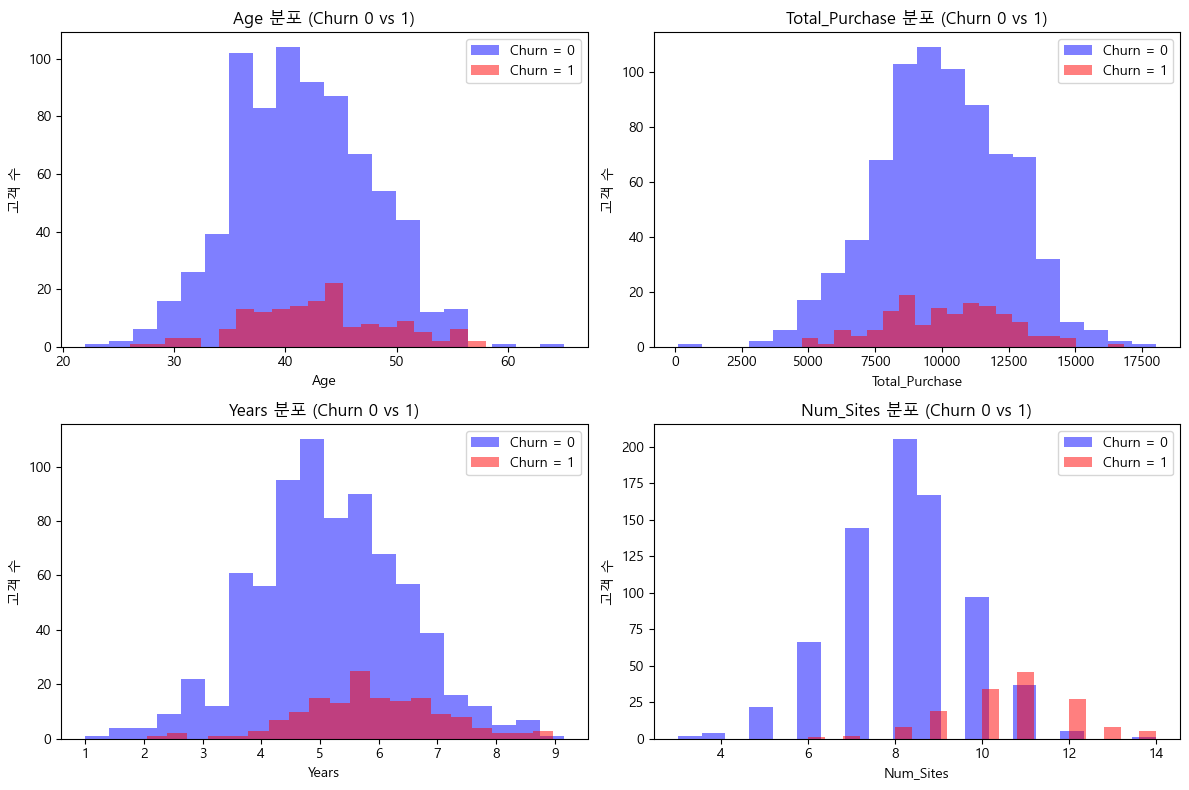

In [ ]:
# "Churn"과 관련된 이탈고객 vs 비이탈고객 시각화
features = ["Age", "Total_Purchase", "Years", "Num_Sites"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()  # 2D -> 1D 배열로 변환하여 반복문에 사용

for i, feature in enumerate(features):
    axs[i].hist(df[df["Churn"] == 0][feature], bins=20, alpha=0.5, label='Churn = 0', color='blue')
    axs[i].hist(df[df["Churn"] == 1][feature], bins=20, alpha=0.5, label='Churn = 1', color='red')
    axs[i].set_title(f'{feature} 분포 (Churn 0 vs 1)')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('고객 수')
    axs[i].legend()

plt.tight_layout()
plt.show()

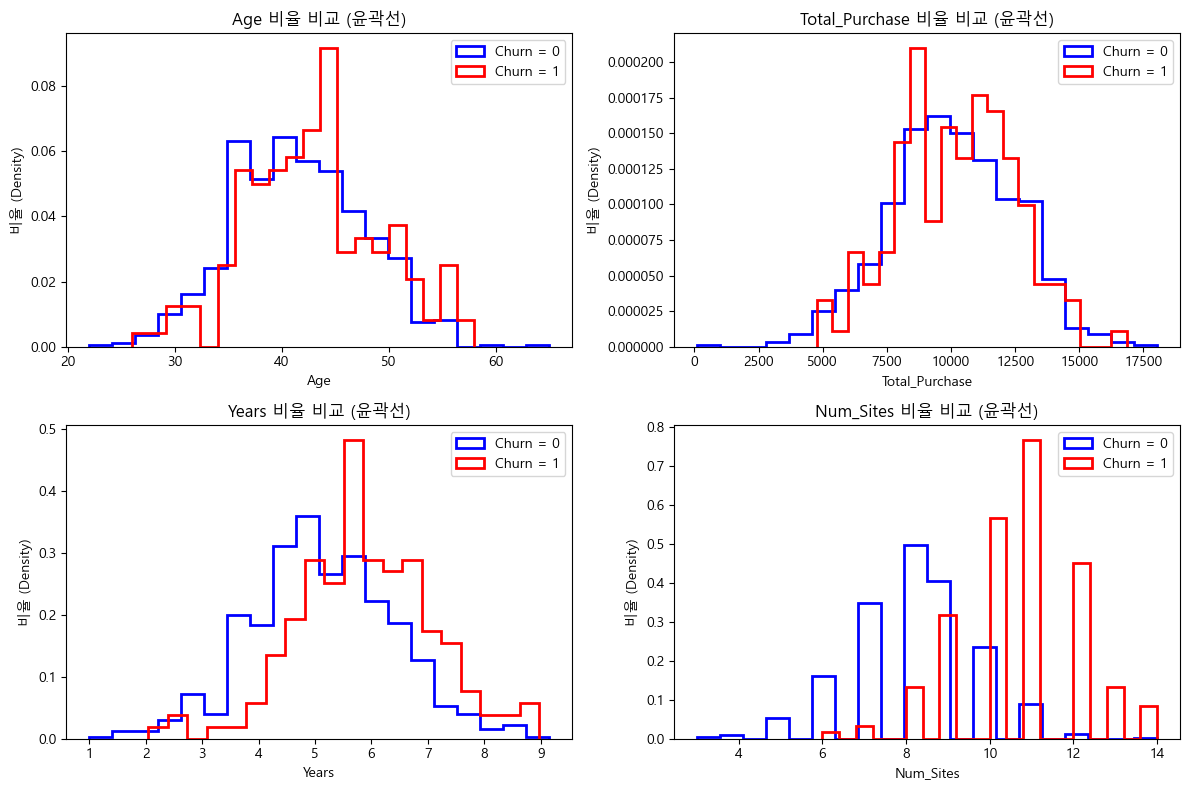

In [ ]:
# "Churn"과 관련된 이탈고객 vs 비이탈고객 비율 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, feature in enumerate(features):
    churn_0 = df[df["Churn"] == 0][feature]
    churn_1 = df[df["Churn"] == 1][feature]

    axs[i].hist(churn_0, bins=20, label="Churn = 0", color="blue", density=True, histtype='step', linewidth=2)
    axs[i].hist(churn_1, bins=20, label="Churn = 1", color="red", density=True, histtype='step', linewidth=2)

    axs[i].set_title(f"{feature} 비율 비교 (윤곽선)")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("비율 (Density)")
    axs[i].legend()

plt.tight_layout()
plt.show()


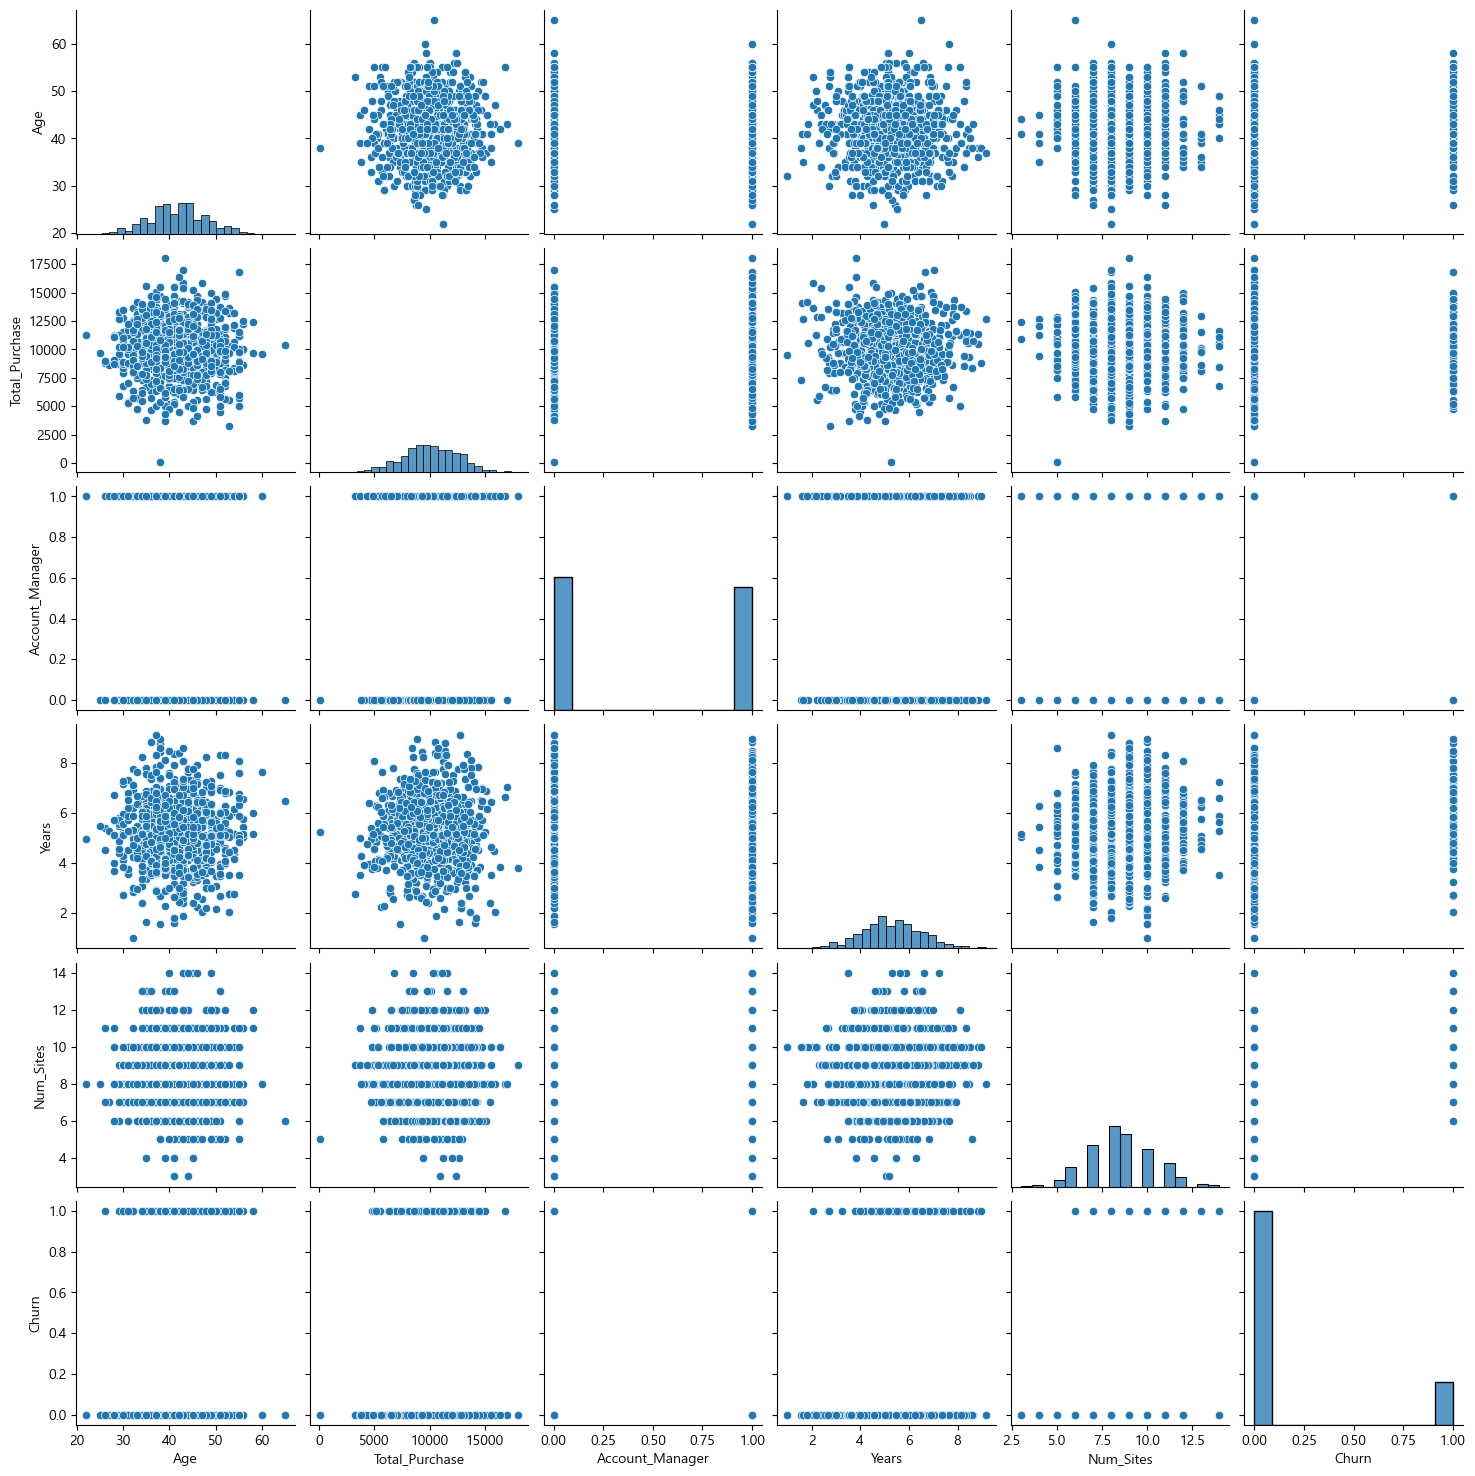

In [10]:
# pairplot 시각화
df_label = ["Age", "Total_Purchase", "Account_Manager", "Years", "Num_Sites", "Churn"]

sns.pairplot(df[df_label])

In [11]:
# 히트맵 시각화
df_heat = df[["Age", "Total_Purchase", "Account_Manager", "Years", "Num_Sites", "Churn"]]
df_heat = df_heat.columns
df_heat = df[df_heat].corr()
df_heat

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


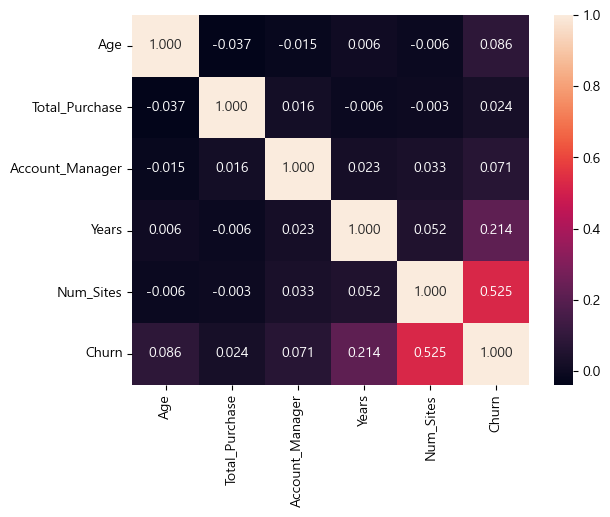

In [12]:
sns.heatmap(df_heat.values, cbar = True, annot= True, fmt = ".3f",
            yticklabels= df_heat, xticklabels= df_heat)
plt.show()

- "Churn" 피처와 관련해서
  - "Num_Sites"와 가장 높은 관련성을 가짐   
    "Num_Sites" > "Years" > "Age" > "Account_Manager" > "Total_Purchase"
  - 대부분의 칼럼과 상관 관계가 낮은 것을 보아 단일 변수로는 이탈여부를 설명 할 수 없음

In [13]:
df1 = df[["Age", "Total_Purchase", "Account_Manager", "Years", "Num_Sites", "Churn"]]
df1.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


### 머신러닝용 데이터 전처리

우리는 수치형 데이터만 이용할 예정입니다. Account_Manager는 다루기 어렵지 않기 때문에 모델학습에 포함할 수도 있겠지만 무작위로 할당된 것이기 때문에 큰 의미가 없을 수 있습니다.

In [ ]:
# 예측 받는 df
new_df = pd.read_csv("./new_customers.csv", index_col=False) # index_col = False 를 이용해 모든 열을 데이터 열로 인식
new_df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            6 non-null      object 
 1   Age              6 non-null      float64
 2   Total_Purchase   6 non-null      float64
 3   Account_Manager  6 non-null      int64  
 4   Years            6 non-null      float64
 5   Num_Sites        6 non-null      float64
 6   Onboard_date     6 non-null      object 
 7   Location         6 non-null      object 
 8   Company          6 non-null      object 
dtypes: float64(4), int64(1), object(4)
memory usage: 564.0+ bytes


- 결측치 없으므로 바로 진행

#### 1. "Account_Manager"을 사용한 학습

In [16]:
# 원핫 인코딩
onehot_df = pd.get_dummies(df1, columns=["Account_Manager"]).astype(int)
onehot_df = onehot_df[["Age", "Total_Purchase", "Years", "Num_Sites", "Account_Manager_0", "Account_Manager_1", "Churn"]]
onehot_df

,Age,Total_Purchase,Years,Num_Sites,Account_Manager_0,Account_Manager_1,Churn
0,42,11066,7,8,1,0,1
1,41,11916,6,11,1,0,1
2,38,12884,6,12,1,0,1
3,42,8010,6,10,1,0,1
4,37,9191,5,9,1,0,1
...,...,...,...,...,...,...,...
895,42,12800,3,8,0,1,0
896,52,9893,6,7,1,0,0
897,45,12056,5,4,1,0,0
898,51,6517,5,10,0,1,0


In [17]:
new_df1 = new_df[["Age", "Total_Purchase", "Account_Manager", "Years", "Num_Sites"]]
onehot_new = pd.get_dummies(new_df1, columns=["Account_Manager"]).astype(int)
onehot_new = onehot_new[["Age", "Total_Purchase", "Years", "Num_Sites", "Account_Manager_0", "Account_Manager_1"]]
onehot_new

,Age,Total_Purchase,Years,Num_Sites,Account_Manager_0,Account_Manager_1
0,37,9935,7,8,0,1
1,23,7526,9,15,0,1
2,65,100,1,15,0,1
3,32,6487,9,14,1,0
4,32,13147,10,8,0,1
5,22,8445,3,14,0,1


In [18]:
x = onehot_df.drop("Churn", axis = 1)
y = onehot_df["Churn"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [20]:
ss= StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_train, y_train)


KNeighborsClassifier()

In [22]:
y_pred = knn.predict(scaled_test)
pd.DataFrame({"ans" : y_test, "Pred" : y_pred})

,ans,Pred
825,0,0
798,0,0
543,0,0
235,0,0
862,0,0
...,...,...
389,0,1
778,0,0
352,0,0
468,0,0


In [23]:
roc = roc_auc_score(y_test, y_pred)
roc

0.7000000000000001

In [24]:
new_preds = knn.predict(onehot_new)

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [25]:
# 새 고객 데이터에 대한 예측
new_preds = knn.predict(onehot_new)

# 결과 붙이기
onehot_new["Churn_Pred"] = new_preds
# 예측 결과 확인
onehot_new[["Churn_Pred"]]

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Churn_Pred
0,0
1,0
2,1
3,0
4,0
5,0


In [26]:
onehot_new

,Age,Total_Purchase,Years,Num_Sites,Account_Manager_0,Account_Manager_1,Churn_Pred
0,37,9935,7,8,0,1,0
1,23,7526,9,15,0,1,0
2,65,100,1,15,0,1,1
3,32,6487,9,14,1,0,0
4,32,13147,10,8,0,1,0
5,22,8445,3,14,0,1,0


#### 2. "Account_Manager"을 사용하지 않은 학습

In [27]:
df2 = df[["Age", "Total_Purchase", "Years", "Num_Sites", "Churn"]]
df2.head()

,Age,Total_Purchase,Years,Num_Sites,Churn
0,42.0,11066.80,7.22,8.0,1
1,41.0,11916.22,6.50,11.0,1
2,38.0,12884.75,6.67,12.0,1
3,42.0,8010.76,6.71,10.0,1
4,37.0,9191.58,5.56,9.0,1


In [28]:
new_df2 = new_df[["Age", "Total_Purchase", "Years", "Num_Sites"]]

In [29]:
# 데이터 분할
x = df2.drop("Churn", axis =1)
y = df2["Churn"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [31]:
ss= StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(scaled_test)
pd.DataFrame({"ans" : y_test, "Pred" : y_pred})

,ans,Pred
825,0,0
798,0,0
543,0,0
235,0,0
862,0,0
...,...,...
389,0,1
778,0,0
352,0,0
468,0,0


In [34]:
roc = roc_auc_score(y_test, y_pred)
roc

0.7066666666666667

In [35]:
# 새 고객 데이터에 대한 예측
new_preds = knn.predict(new_df2)

# 결과 붙이기
new_df2["Churn_Pred"] = new_preds
# 예측 결과 확인
new_df2[["Churn_Pred"]]

new_df2

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\MSI\AppData\Local\Temp\ipykernel_16348\1143425455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2["Churn_Pred"] = new_preds


,Age,Total_Purchase,Years,Num_Sites,Churn_Pred
0,37.0,9935.53,7.71,8.0,0
1,23.0,7526.94,9.28,15.0,0
2,65.0,100.00,1.00,15.0,1
3,32.0,6487.50,9.40,14.0,0
4,32.0,13147.71,10.00,8.0,0
5,22.0,8445.26,3.46,14.0,0


#### 3. 기타 : "Onborded_data" 중 년도만 뽑아서 학습하기

In [36]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [37]:
df['Onboard_date'] = df['Onboard_date'].astype(str).str[:4].astype(int)
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    int32  
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 66.9+ KB


In [39]:
df3 = df[["Age", "Total_Purchase", "Years", "Num_Sites", "Onboard_date", "Churn"]]
df3.head()

,Age,Total_Purchase,Years,Num_Sites,Onboard_date,Churn
0,42.0,11066.80,7.22,8.0,2013,1
1,41.0,11916.22,6.50,11.0,2013,1
2,38.0,12884.75,6.67,12.0,2016,1
3,42.0,8010.76,6.71,10.0,2014,1
4,37.0,9191.58,5.56,9.0,2016,1


In [40]:
new_df['Onboard_date'] = new_df['Onboard_date'].astype(str).str[:4].astype(int)
new_df3 = new_df[["Age", "Total_Purchase", "Years", "Num_Sites", "Onboard_date"]]
new_df3

,Age,Total_Purchase,Years,Num_Sites,Onboard_date
0,37.0,9935.53,7.71,8.0,2011
1,23.0,7526.94,9.28,15.0,2013
2,65.0,100.00,1.00,15.0,2006
3,32.0,6487.50,9.40,14.0,2016
4,32.0,13147.71,10.00,8.0,2012
5,22.0,8445.26,3.46,14.0,2011


In [41]:
x = df3.drop("Churn", axis = 1)
y = df3["Churn"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [43]:
ss= StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(scaled_test)
pd.DataFrame({"ans" : y_test, "Pred" : y_pred})

,ans,Pred
825,0,0
798,0,0
543,0,0
235,0,0
862,0,0
...,...,...
389,0,0
778,0,0
352,0,0
468,0,0


In [46]:
roc = roc_auc_score(y_test, y_pred)
roc

0.76

In [47]:
# 새 고객 데이터에 대한 예측
new_preds = knn.predict(new_df3)

# 결과 붙이기
new_df3["Churn_Pred"] = new_preds
# 예측 결과 확인
new_df3[["Churn_Pred"]]

new_df3

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\MSI\AppData\Local\Temp\ipykernel_16348\696276333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df3["Churn_Pred"] = new_preds


,Age,Total_Purchase,Years,Num_Sites,Onboard_date,Churn_Pred
0,37.0,9935.53,7.71,8.0,2011,0
1,23.0,7526.94,9.28,15.0,2013,0
2,65.0,100.00,1.00,15.0,2006,0
3,32.0,6487.50,9.40,14.0,2016,0
4,32.0,13147.71,10.00,8.0,2012,0
5,22.0,8445.26,3.46,14.0,2011,0


In [49]:
df1.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


In [ ]:
x = df.drop("Churn", axis = 1)
y = df["Churn"]

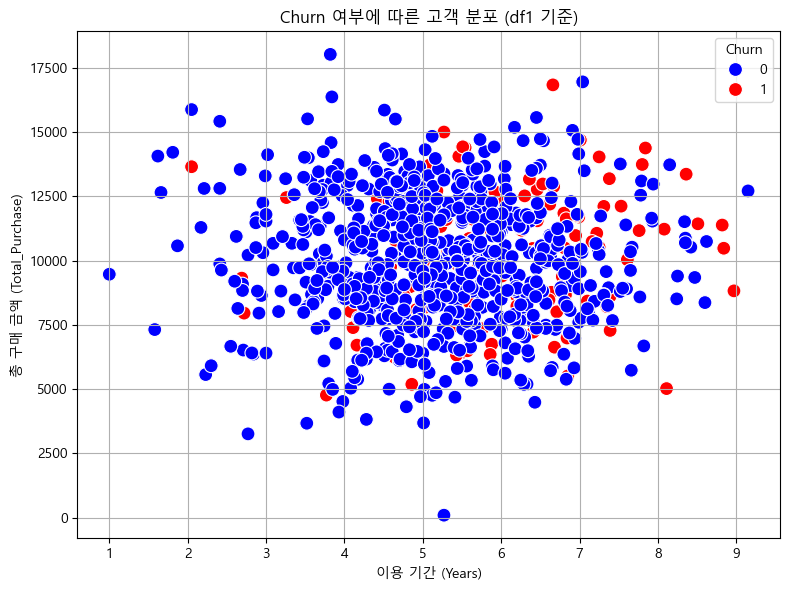

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df1,
    x="Years",
    y="Total_Purchase",
    hue="Churn",               # 이탈 여부에 따라 색상 구분
    palette={0: "blue", 1: "red"},
    s=100
)

plt.title("Churn 여부에 따른 고객 분포 (df1 기준)")
plt.xlabel("이용 기간 (Years)")
plt.ylabel("총 구매 금액 (Total_Purchase)")
plt.legend(title="Churn")
plt.grid(True)
plt.tight_layout()
plt.show()
